The objective of this notebook is to do a basic analysis of the dataset and check its characteristics

## Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
df = pd.read_csv("../data/bronze/spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.describe()


,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Change data types

In [5]:
df['Category'] = df['Category'].map({"ham": 0, "spam": 1}).astype(int)
df['Message'] = df['Message'].astype(str)

In [6]:
df_duplicated = df['Message'].duplicated().sum()

print(f"Total duplicated rows: {df_duplicated}")


Total duplicated rows: 415


In [7]:
df['Message'] = df['Message'].str.strip().str.lower()
duplicated_rows = df[df['Message'].duplicated(keep=False)]
grouped_duplicates = duplicated_rows.groupby('Message')
grouped_duplicates


for message, group in grouped_duplicates:
    print(f"Message: {message}")
    print(group)
    print("-" * 50)  

Message: #error!
      Category  Message
505          1  #error!
717          1  #error!
2124         1  #error!
--------------------------------------------------
Message: 1) go to write msg 2) put on dictionary mode 3)cover the screen with hand, 4)press  &lt;#&gt; . 5)gently remove ur hand.. its interesting..:)
      Category                                            Message
1373         0  1) go to write msg 2) put on dictionary mode 3...
2163         0  1) go to write msg 2) put on dictionary mode 3...
2344         0  1) go to write msg 2) put on dictionary mode 3...
--------------------------------------------------
Message: 18 days to euro2004 kickoff! u will be kept informed of all the latest news and results daily. unsubscribe send get euro stop to 83222.
      Category                                            Message
1050         1  18 days to euro2004 kickoff! u will be kept in...
2719         1  18 days to euro2004 kickoff! u will be kept in...
---------------------------

Observations:

Is duplication a symptom of SPAM messages? Nope


In [8]:
df.drop_duplicates(inplace=True)

## Visualization

### Distribution of HAM VS. SPAM messages

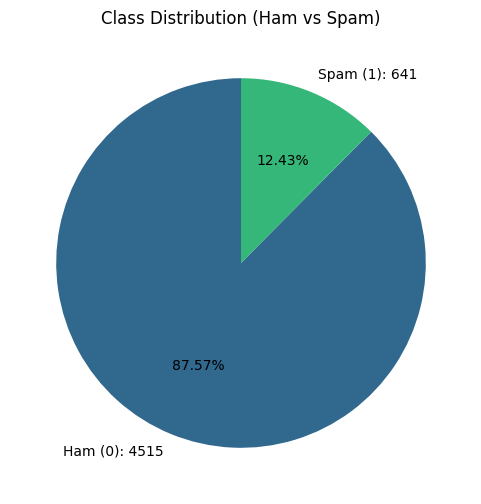

In [9]:
category_counts = df['Category'].value_counts()
category_labels = ["Ham (0)", "Spam (1)"]

viridis_colors = sns.color_palette("viridis", len(category_counts))

plt.figure(figsize=(6, 6))
plt.pie(
    category_counts,
    labels=[f"{label}: {count}" for label, count in zip(category_labels, category_counts)], 
    autopct=lambda p: f"{p:.2f}%",  
    colors=viridis_colors,  
    startangle=90,  
)
plt.title("Class Distribution (Ham vs Spam)")
plt.show()


Observations:

- The dataset is very imbalanced with the target class only containing a 13,41% of the class "SPAM" 

### Word count distribution

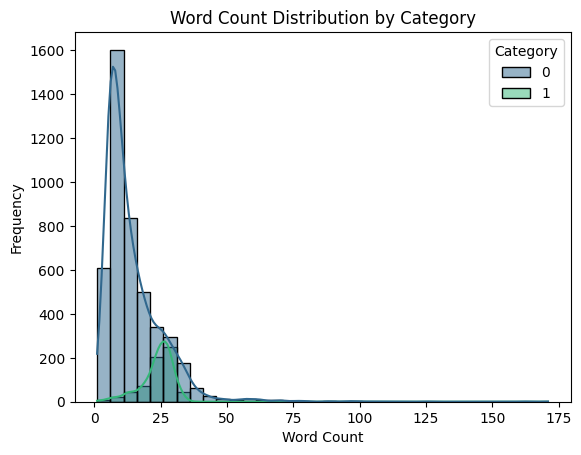

In [10]:
df['word_count'] = df['Message'].apply(lambda x: len(x.split()))
bins = np.arange(df['word_count'].min(), df['word_count'].max() + 5, 5)
sns.histplot(data=df, x='word_count', hue='Category', bins=bins, kde=True, palette="viridis")
plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


### High word count distribution

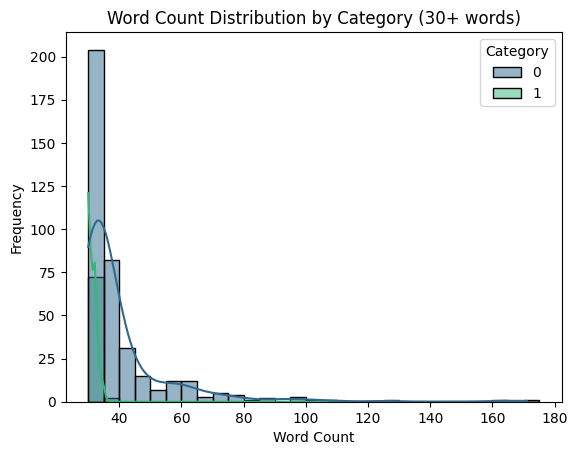

In [11]:
df_filtered = df[df['word_count'] >= 30]

bins = np.arange(df_filtered['word_count'].min(), df_filtered['word_count'].max() + 5, 5)
sns.histplot(data=df_filtered, x='word_count', hue='Category', bins=bins, kde=True, palette="viridis")
plt.title("Word Count Distribution by Category (30+ words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [12]:
spam_emails = df[df['Category'] == 1]

max_words_idx = spam_emails['word_count'].idxmax()
max_words_email = spam_emails.loc[max_words_idx, 'Message']

print(f"This is the e-mail with highest number of words ({spam_emails.loc[max_words_idx, 'word_count']} words):\n")
print(max_words_email)

This is the e-mail with highest number of words (35 words):

hi i'm sue. i am 20 years old and work as a lapdancer. i love sex. text me live - i'm i my bedroom now. text sue to 89555. by textoperator g2 1da 150ppmsg 18+


Observations: 

- Most HAM messages have between 0 and 25 words. The frequency falls dramatically when the word count increases. 
- Most SPAM messages are also short but they are more likely to have between 10 and 40 words. 
- There is a high superposition in the range of 20-35 words that could affect the classification.
- There are no long SPAM messages (> 35 words)
- HAM messages have higher variability than the SPAM messages (as per word count)



### Character count distribution

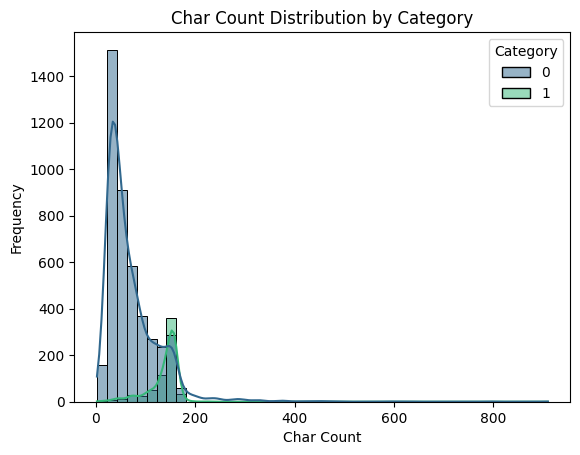

In [13]:
df['char_count'] = df['Message'].apply(len)
bins = np.arange(df['char_count'].min(), df['word_count'].max() + 20, 20)
sns.histplot(data=df, x='char_count', hue='Category', bins=bins, kde=True, palette="viridis")
plt.title("Char Count Distribution by Category")
plt.xlabel("Char Count")
plt.ylabel("Frequency")
plt.show()

### High character count distribution

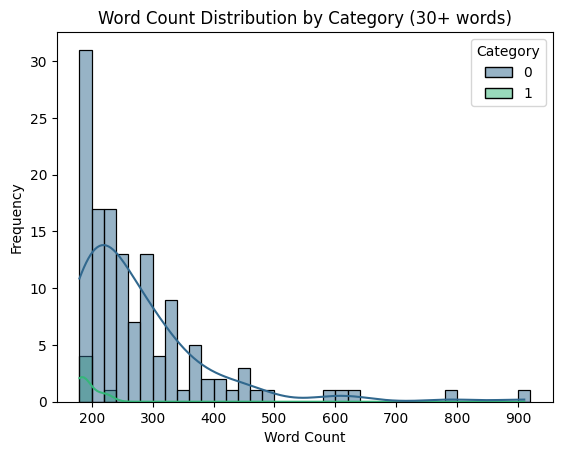

In [14]:
df_filtered = df[df['char_count'] >= 180]

bins = np.arange(df_filtered['char_count'].min(), df_filtered['char_count'].max() + 20, 20)
sns.histplot(data=df_filtered, x='char_count', hue='Category', bins=bins, kde=True, palette="viridis")
plt.title("Word Count Distribution by Category (30+ words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [15]:
spam_emails = df[df['Category'] == 1]

max_chars_idx = spam_emails['char_count'].idxmax()
max_chars_email = spam_emails.loc[max_chars_idx, 'Message']

print(f"This is the e-mail with highest number of characters ({spam_emails.loc[max_chars_idx, 'char_count']} chars):\n")
print(max_words_email)

This is the e-mail with highest number of characters (223 chars):

hi i'm sue. i am 20 years old and work as a lapdancer. i love sex. text me live - i'm i my bedroom now. text sue to 89555. by textoperator g2 1da 150ppmsg 18+


Observations:

- The distribution of HAM messages per char count shows that there are a lot os messages with very few characters ( <100 chars)
- The distribution of SPAM messages per char count shows that there are a lot of messages with more characters ( >100 chars)
- The SPAM distribution goes dramatically down after 150 chars
- There are no more SPAM messages when the count is higher than 223 chars
- HAM messages have more variability in number of chars than SPAM messages 

# Data Cleaning

In [16]:
import re
import string

In [17]:
pd.set_option('display.max_colwidth', None)

In [18]:
df_cleaned = df.copy()

df_cleaned['Message'].iloc[0:10]

0                                                     go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
1                                                                                                                                       ok lar... joking wif u oni...
2         free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
3                                                                                                                   u dun say so early hor... u c already then say...
4                                                                                                       nah i don't think he goes to usf, he lives around here though
5                 freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv
6   

### Remove punctuation

For more information about the criteria, check the file special_chars_analysis.ipynb

In [19]:
from string import punctuation 
def clean_text(text):
    special_replacements = {
        r"£": "pound",
        r"\$": "dollar",
        r"\€": "euro",
        r"%": "percentage", 
        r"ì": "i",
        r"ü": "you",
        }
    
    for pattern, replacement in special_replacements.items():
        text = re.sub(pattern, replacement, text)
    text = text.lower()
    text = re.sub('<[^<>]+>', ' ', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub('[0-9]+', 'number', text)
    text = re.sub('[^\s]+@[^\s]+', 'emailaddr', text)
    text = text.translate(str.maketrans('', '', punctuation))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


df_cleaned['Message']=df_cleaned['Message'].apply(clean_text)

In [20]:
df_cleaned['Message'].iloc[0:10]

0                                                              go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1                                                                                                                                             ok lar joking wif u oni
2    free entry in number a wkly comp to win fa cup final tkts numberst may number text fa to number to receive entry questionstd txt ratetcs apply numberovernumbers
3                                                                                                                         u dun say so early hor u c already then say
4                                                                                                         nah i dont think he goes to usf he lives around here though
5       freemsg hey there darling its been number weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send poundnumbernumber to rcv
6   

In [44]:
df_cleaned.loc[960]

Category          0
Message       where
word_count        2
char_count        7
Name: 960, dtype: object

#### Tokenization

In [21]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df_tokenized = df_cleaned.copy()


[nltk_data] Downloading package punkt to /home/maldu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/maldu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [22]:
df_tokenized['Message'] = df_tokenized['Message'].apply(word_tokenize)
df_tokenized['Message']

0                                                                                            [go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]
1                                                                                                                                                                                         [ok, lar, joking, wif, u, oni]
2                          [free, entry, in, number, a, wkly, comp, to, win, fa, cup, final, tkts, numberst, may, number, text, fa, to, number, to, receive, entry, questionstd, txt, ratetcs, apply, numberovernumbers]
3                                                                                                                                                                [u, dun, say, so, early, hor, u, c, already, then, say]
4                                                                                                                                   

#### Stopwords

In [23]:
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

df_tokenized['Message'] = df_tokenized['Message'].apply(lambda x: [word for word in x if word not in stop_words])
df_tokenized['Message']

0                                                                              [go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]
1                                                                                                                                                   [ok, lar, joking, wif, u, oni]
2       [free, entry, number, wkly, comp, win, fa, cup, final, tkts, numberst, may, number, text, fa, number, receive, entry, questionstd, txt, ratetcs, apply, numberovernumbers]
3                                                                                                                                    [u, dun, say, early, hor, u, c, already, say]
4                                                                                                                             [nah, dont, think, goes, usf, lives, around, though]
                                                                                           ...           

In [43]:
df_tokenized.loc[960]

Category       0
Message       []
word_count     2
char_count     7
Name: 960, dtype: object

#### Lemmatizing

Why? 

E-mails can contain keyword which semantics are important and the spam classification needs of precise patterns in the language that could be lost if we use the stemming technique



In [24]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
df_lemmatized = df_tokenized.copy()

lemmatizer=WordNetLemmatizer()
def lem_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df_lemmatized['Message'] = df_lemmatized['Message'].apply(lem_tokens)
df_lemmatized['Message']

[nltk_data] Downloading package wordnet to /home/maldu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                                                              [go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]
1                                                                                                                                                   [ok, lar, joking, wif, u, oni]
2       [free, entry, number, wkly, comp, win, fa, cup, final, tkts, numberst, may, number, text, fa, number, receive, entry, questionstd, txt, ratetcs, apply, numberovernumbers]
3                                                                                                                                    [u, dun, say, early, hor, u, c, already, say]
4                                                                                                                                [nah, dont, think, go, usf, life, around, though]
                                                                                           ...           

In [25]:
df_lemmatized

,Category,Message,word_count,char_count
0,0,"[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",20,111
1,0,"[ok, lar, joking, wif, u, oni]",6,29
2,1,"[free, entry, number, wkly, comp, win, fa, cup, final, tkts, numberst, may, number, text, fa, number, receive, entry, questionstd, txt, ratetcs, apply, numberovernumbers]",28,155
3,0,"[u, dun, say, early, hor, u, c, already, say]",11,49
4,0,"[nah, dont, think, go, usf, life, around, though]",13,61
...,...,...,...,...
5567,1,"[numbernd, time, tried, number, contact, u, u, poundnumber, pound, prize, number, claim, easy, call, number, nownumber, numberp, per, minute, btnationalrate]",30,160
5568,0,"[b, going, esplanade, fr, home]",8,36
5569,0,"[pity, mood, soany, suggestion]",10,57
5570,0,"[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, u, free]",26,125


In [26]:
df_lemmatized.isna().sum()

Category      0
Message       0
word_count    0
char_count    0
dtype: int64

In [27]:
df_lemmatized['Message'] = df_lemmatized['Message'].apply(lambda x: ' '.join(x))
df_lemmatized['Message']

0                                                                       go jurong point crazy available bugis n great world la e buffet cine got amore wat
1                                                                                                                                  ok lar joking wif u oni
2       free entry number wkly comp win fa cup final tkts numberst may number text fa number receive entry questionstd txt ratetcs apply numberovernumbers
3                                                                                                                      u dun say early hor u c already say
4                                                                                                                 nah dont think go usf life around though
                                                                               ...                                                                        
5567              numbernd time tried number contact u u poundnumber p

In [28]:
df_lemmatized.to_csv("../data/silver/df_preprocessed.csv", index= False)

In [42]:
df_lemmatized.loc[960]

Category      0
Message        
word_count    2
char_count    7
Name: 960, dtype: object

#### Vectorization

In [29]:
sdfgt


NameError: name 'sdfgt' is not defined

In [ ]:
X = vectors
Y = df['spam']

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [ ]:
X_train

In [ ]:
#### Logistic Regression



In [ ]:


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)



In [ ]:
Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)
print(cm)

accuracy_score(Y_test,Y_Pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_Pred))

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_Pred)

In [ ]:
#### Decision Tree

In [ ]:


from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)



In [ ]:
#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0,)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

In [ ]:
#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

In [ ]:
#### SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)

In [ ]:
#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p = 2)
classifier.fit(X_train,Y_train)

Y_Pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_Pred)

accuracy_score(Y_test,Y_Pred)